In [3]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD,IncrementalPCA
from scipy import sparse
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt 
import numpy as np
import os 
import warnings
warnings.filterwarnings('ignore')
parent = os.path.dirname(os.path.dirname(os.getcwd()))
data = pd.read_csv(parent + '/CMS_datasets/data/year2013_2014_combined_with_labels.csv')

In [17]:
def TruncSVD_Pipe(data):
    ##Data Cleaning##
    data_mod = data.drop(columns=['Rndrng_Prvdr_Mdcr_Prtcptg_Ind','Rndrng_NPI','Rndrng_Prvdr_Gndr','Rndrng_Prvdr_Type','YEAR'])
    data_mod.fillna(data_mod.mean(), inplace=True)

    ##Setting Target Threshold##
    target = .99
    n = 0
    truncsvd = TruncatedSVD(n_components = n)
    sparse_data = sparse.csr_matrix(data_mod.values)
    truncsvd.fit(sparse_data)
    target_mod = truncsvd.explained_variance_ratio_.sum()
    ## Truncated SVD Training Loop ##
    while target_mod < target:
        n += 1
        truncsvd = TruncatedSVD(n_components = n)
        truncsvd.fit(sparse_data)

        ## Checking Target Threshold ##
        target_mod = truncsvd.explained_variance_ratio_.sum()

    return n,truncsvd.explained_variance_ratio_



def TruncSVD_Pipe_to_Sparse(data, n,outputdir=False,out='None'):

    data_mod = data.drop(columns=['Rndrng_Prvdr_Mdcr_Prtcptg_Ind','Rndrng_NPI','Rndrng_Prvdr_Gndr','Rndrng_Prvdr_Type','YEAR'])
    data_mod.fillna(data_mod.mean(), inplace=True)

    ## Truncated SVD Training Loop ##

    truncsvd = TruncatedSVD(n_components = n)
    sparse_data = sparse.csr_matrix(data_mod.values)
    sparse_data_transform = truncsvd.fit_transform(sparse_data)
 
    if outputdir:
        pd.DataFrame(sparse_data_transform).to_csv(out)

    return sparse_data_transform


def MiniBatchPCA_Pipe(data):
    ## Data Cleaning ##
    data_mod = data.drop(columns=['Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Rndrng_NPI', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Type', 'YEAR'])
    data_mod.fillna(data_mod.mean(), inplace=True)

    ## Setting Target Threshold ##
    target = 0.99
    n = 1
    mb_pca = IncrementalPCA(n_components=n, batch_size=500)  # Set an appropriate batch size here
    sparse_data = sparse.csr_matrix(data_mod.values)

    mb_pca.fit(sparse_data)
    target_mod = mb_pca.explained_variance_ratio_.sum()

    ## Mini-Batch PCA Training Loop ##
    while target_mod < target:
        n += 1
        mb_pca = IncrementalPCA(n_components=n, batch_size=500)  # Set an appropriate batch size here
        mb_pca.fit(sparse_data)

        ## Checking Target Threshold ##
        target_mod = mb_pca.explained_variance_ratio_.sum()

    return n,mb_pca.explained_variance_ratio_




def MiniBatchPCA_Pipe_to_Components(data, n, outputdir=False,out = "None"):
    ## Data Cleaning ##
    data_mod = data.drop(columns=['Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Rndrng_NPI', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Type', 'YEAR'])
    data_mod.fillna(data_mod.mean(), inplace=True)

    ## IncrementalPCA ##
    batch_size = 500  # Set an appropriate batch size here
    mb_pca = IncrementalPCA(n_components=n, batch_size=batch_size)

    

    mb_pca = IncrementalPCA(n_components=n, batch_size=500)

    mb_pca.partial_fit(data_mod)

    transformdata = mb_pca.transform(data_mod)

   

    if outputdir:
        pd.DataFrame(transformdata).to_csv(out)

    return transformdata



def plot_explained_variance(explained_variance, n_components, figsize=(8, 6)):
    explained_variance_cumsum = np.cumsum(explained_variance)

    plt.figure(figsize=figsize)

    plt.barh(
        range(0, len(explained_variance)),
        explained_variance,
        alpha=0.5,
        color="blue",  # Change the color of the bars here
        align="center",
        label="Individual explained variance",
    )

    plt.step(
        explained_variance_cumsum,
        range(0, len(explained_variance_cumsum)),
        where="mid",
        color="orange",  # Change the color of the step line here
        label="Cumulative explained variance",
        linestyle="--", 
    )

    plt.xlabel(f"Explained variance ratio: {round(explained_variance.sum(), 2)}")
    plt.ylabel(f"Components: {n_components}")
    plt.title(f'Explained Variance for {n_components} Components')

 
    plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0)) 

    plt.tight_layout()
    plt.show()

In [18]:
n = MiniBatchPCA_Pipe(data)
n

(3, array([0.95239375, 0.02705794, 0.01725922]))

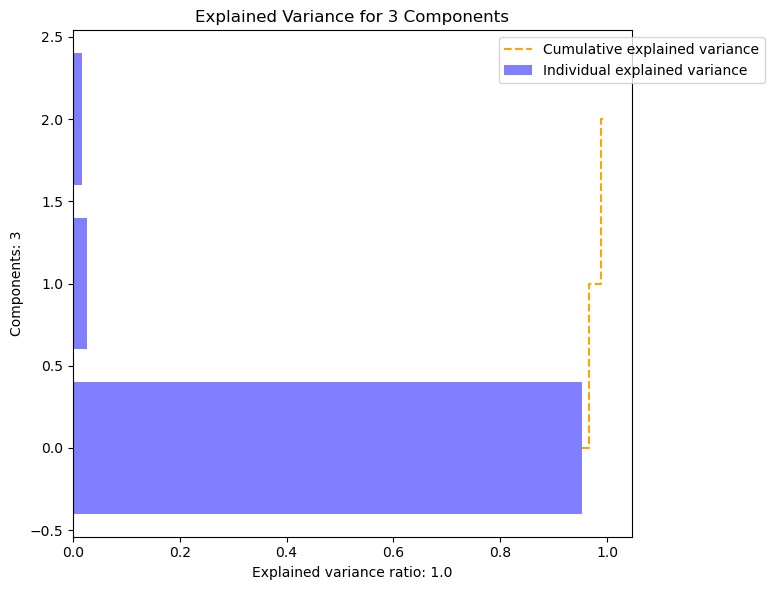

In [9]:
plot_explained_variance(n[1],n[0])

In [12]:
data_mod = data.drop(columns=['Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Rndrng_NPI', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Type', 'YEAR'])
data_mod.fillna(data_mod.mean(), inplace=True)

## IncrementalPCA ##
mb_pca = IncrementalPCA(n_components=3, batch_size=500)
mb_pca.partial_fit(data_mod)
transformdata = mb_pca.transform(data_mod)

In [13]:
data_mod.shape

(1847558, 84)

In [14]:
transformdata.shape

(1847558, 3)